##  Analytical definition of Heaviside Kv profile 

Reviewer 2: "You are using the opposite sign convention".

Fix: For z that increases upwards (positive above surface) the smoothed Heaviside function should be:

$Kv(z) = \begin{cases}
\kappa_{bg} &\mbox{if } z > H_r+\epsilon \\
\kappa_{bg}+ \kappa_{can}\left(0.5 + \frac{H_r-z}{2\epsilon} + \frac{1}{2\pi}\sin{\frac{\pi(H_r-z)}{\epsilon}}\right) & \mbox{if } H_r+\epsilon > z > H_r-\epsilon \\
\kappa_{can}+\kappa_{bg} & \mbox{if }  H_r-\epsilon > z
 \end{cases} $


 $H_{r}$ is rim depth ($<0$)
 
 $z$ < 0 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sympy as sym
sym.init_printing() # enable fancy printing

In [106]:
# Set appearance options seaborn

sns.set_style('darkgrid')
sns.set_context('notebook')

In [107]:
def Kv(kbg,kcan,Hr,eps,z):
    
    k1 = np.where(z > Hr+eps ,kbg, 0.)
    k2 = np.where((z <= Hr+eps) & (z >= Hr-eps), 
                  kbg + kcan*(0.5 + ((Hr-z)/(2*eps)) + (1/(2*np.pi))*(np.sin(np.pi*(Hr-z)/eps))),
                  0.)    
    k3 = np.where(z < Hr-eps ,kcan+kbg, 0.)
    
    return(k1+k2+k3)
        

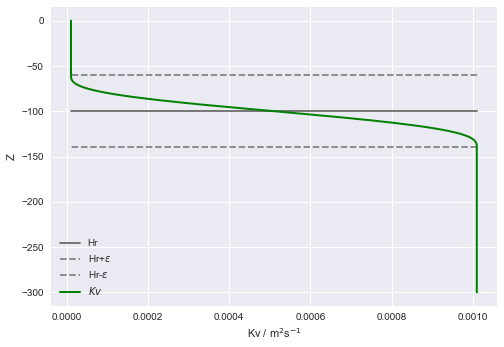

In [115]:
kbg = 1E-5
kcan = 1E-3
Hr = -100
eps = 40
z = np.linspace(-300,0,200)
diffusi = Kv(kbg,kcan,Hr,eps,z)

plt.plot(diffusi,Hr*np.ones(np.shape(diffusi)),color='0.4',label='Hr')
plt.plot(diffusi,Hr*np.ones(np.shape(diffusi))+eps,'--',color='grey',label='Hr+$\epsilon$')
plt.plot(diffusi,Hr*np.ones(np.shape(diffusi))-eps,'--',color='grey',label='Hr-$\epsilon$')
plt.plot(diffusi,z, 'g', linewidth=2, label='$Kv$')
plt.xlabel(r'Kv / m$^2$s$^{-1}$')
plt.ylabel('Z')
plt.legend(loc=0)